In [52]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import os

sinasc = pd.read_csv('/content/SINASC_RO_2019.csv')
sinasc.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [53]:
def analise_mensal(data, key, month, values, func, ylabel, xlabel):
  data[key] = pd.to_datetime(data[key])
  match month.upper():
    case 'JAN':
      month = 'January'
    case 'FER':
      month = 'February'
    case 'MAR':
      month = 'March'
    case 'ABR':
      month = 'April'
    case 'MAI':
      month = 'May'
    case 'JUN':
      month = 'June'
    case 'JUL':
      month = 'July'
    case 'AGO':
      month = 'August'
    case 'SET':
      month = 'September'
    case 'OUT':
      month = 'October'
    case 'NOV':
      month = 'November'
    case 'DEZ':
      month = 'December'

  mensal = data[data[key].dt.strftime('%B') == month]
  ax = pd.pivot_table(mensal, values=values, index=key, aggfunc=func).plot(figsize=[15,5])
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.savefig(f'Análise_mês_{month}.png')
  mensal.to_csv(f'Análise_mês_{month}.csv', index=False)
  return mensal, ax

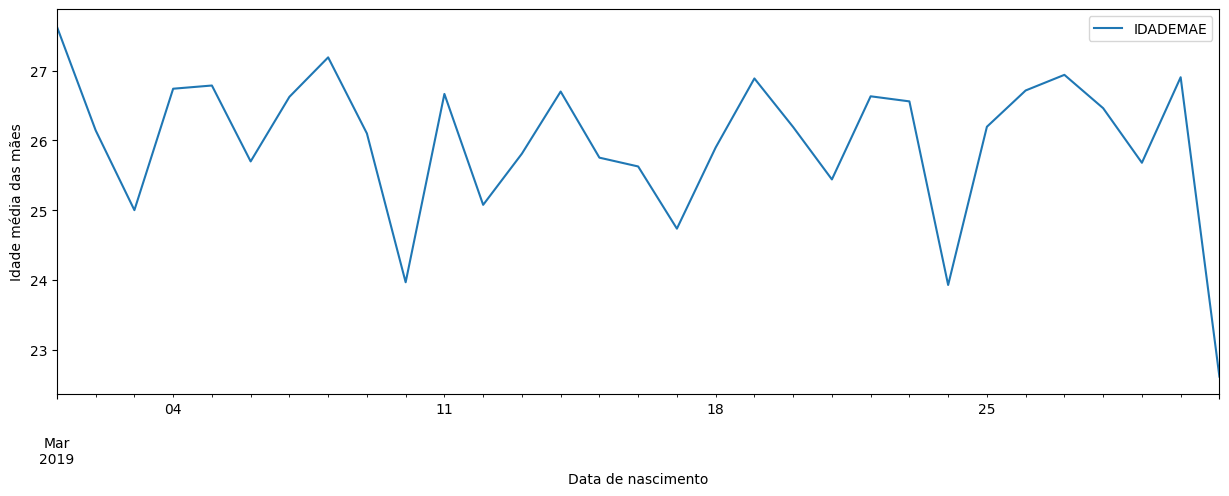

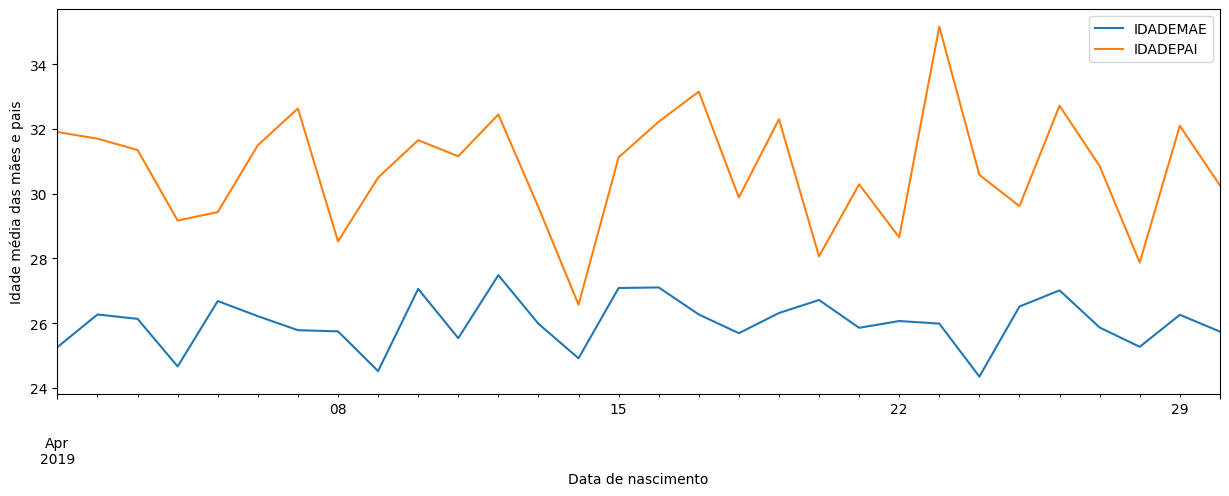

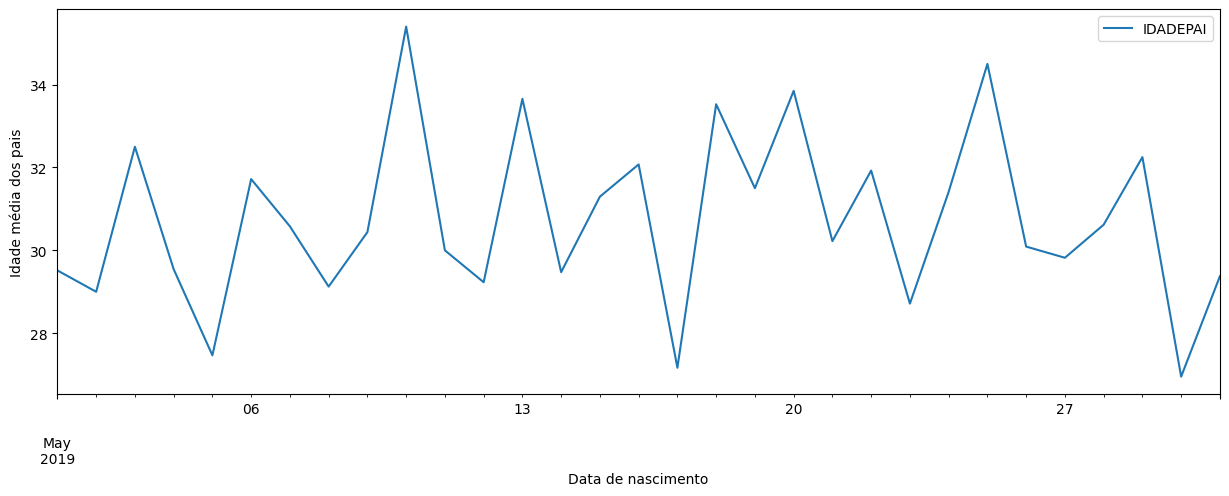

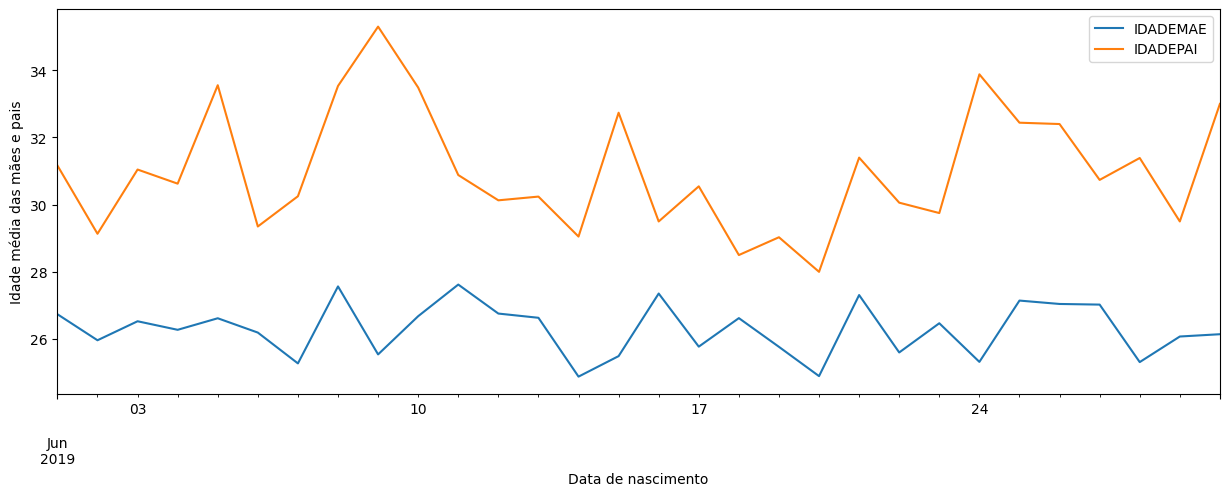

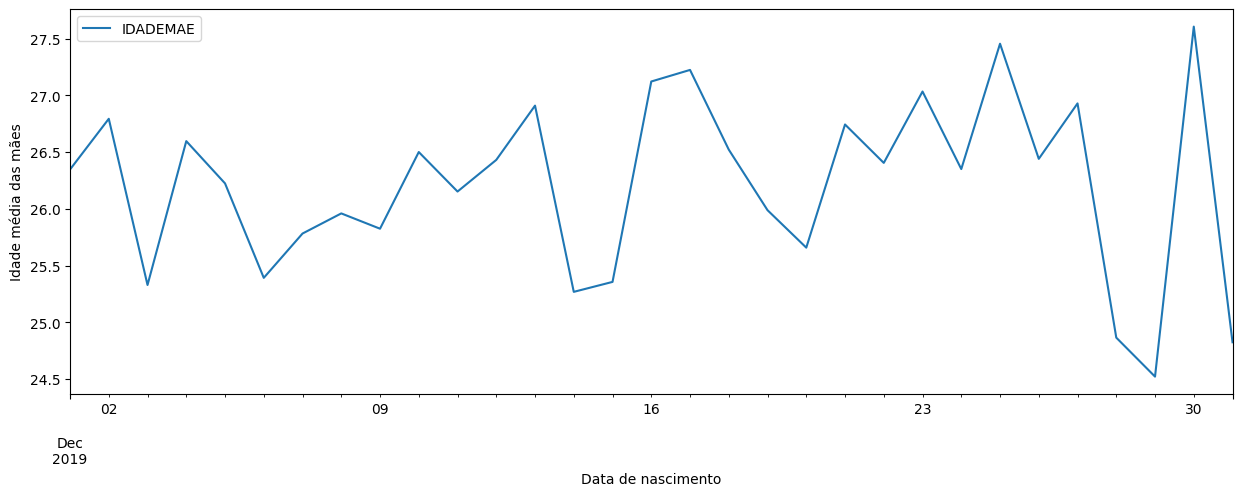

In [56]:
mar = analise_mensal(sinasc, 'DTNASC', 'MAR', ['IDADEMAE'], 'mean', 'Idade média das mães', 'Data de nascimento')
abr = analise_mensal(sinasc, 'DTNASC', 'ABR', ['IDADEMAE', 'IDADEPAI'], 'mean', 'Idade média das mães e pais', 'Data de nascimento')
mai = analise_mensal(sinasc, 'DTNASC', 'MAI', ['IDADEPAI'], 'mean', 'Idade média dos pais', 'Data de nascimento')
jun = analise_mensal(sinasc, 'DTNASC', 'JUN', ['IDADEMAE', 'IDADEPAI'], 'mean', 'Idade média das mães e pais', 'Data de nascimento')
dez = analise_mensal(sinasc, 'DTNASC', 'DEZ', ['IDADEMAE'], 'mean', 'Idade média das mães', 'Data de nascimento')

In [ ]:
# Acredito que fazer uma boa função para poder gerar os gráficos seja o suficiente.